In [1]:
import math, random
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cv
import pandas as pd
import scipy
import time
import gurobipy as gp
from gurobipy import GRB

# NLP on data

Use NLP bursty model for real data: observed, MAP and PS and investigate results

## Load datasets

In [2]:
# Observed count data
data_OB = pd.read_csv("..\Data\SS3_c57_UMIs_concat_cleaned.csv", index_col="Unnamed: 0")
data_OB.head()

,SS3_MAF_Leo171129_p2_S10,SS3_MAF_Leo171129_p2_S12,SS3_MAF_Leo171129_p2_S13,SS3_MAF_Leo171129_p2_S14,SS3_MAF_Leo171129_p2_S16,SS3_MAF_Leo171129_p2_S17,SS3_MAF_Leo171129_p2_S18,SS3_MAF_Leo171129_p2_S19,SS3_MAF_Leo171129_p2_S1,SS3_MAF_Leo171129_p2_S20,...,SS3_MAF_leo180223_p4_S182,SS3_MAF_leo180223_p4_S186,SS3_MAF_leo180223_p4_S187,SS3_MAF_leo180223_p4_S191,SS3_MAF_leo180223_p4_S185,SS3_MAF_leo180223_p4_S189,SS3_MAF_leo180223_p4_S188,SS3_MAF_leo180223_p4_S190,SS3_MAF_leo180223_p4_S98,SS3_MAF_leo180223_p4_S99
0610007P14Rik,0.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,7.0,2.0,...,1.0,3.0,0.0,1.0,2.0,9.0,4.0,0.0,0.0,0.0
0610009B22Rik,10.0,4.0,NaN,NaN,0.0,14.0,26.0,6.0,1.0,2.0,...,6.0,5.0,2.0,1.0,14.0,0.0,1.0,4.0,3.0,2.0
0610031J06Rik,17.0,18.0,9.0,14.0,0.0,9.0,6.0,22.0,1.0,10.0,...,18.0,9.0,3.0,2.0,8.0,31.0,15.0,1.0,1.0,2.0
1110007C09Rik,1.0,0.0,4.0,9.0,0.0,0.0,NaN,0.0,NaN,0.0,...,4.0,2.0,NaN,6.0,0.0,0.0,5.0,0.0,2.0,0.0
1110037F02Rik,0.0,0.0,4.0,0.0,2.0,10.0,0.0,2.0,8.0,0.0,...,2.0,4.0,0.0,1.0,4.0,3.0,6.0,0.0,0.0,3.0


In [3]:
# MAP count data
data_MAP = pd.read_csv("..\Data\SS3_c57_UMIs_concat_MAP.csv", index_col="Unnamed: 0")
data_MAP.head()

,SS3_MAF_Leo171129_p2_S10,SS3_MAF_Leo171129_p2_S12,SS3_MAF_Leo171129_p2_S13,SS3_MAF_Leo171129_p2_S14,SS3_MAF_Leo171129_p2_S16,SS3_MAF_Leo171129_p2_S17,SS3_MAF_Leo171129_p2_S18,SS3_MAF_Leo171129_p2_S19,SS3_MAF_Leo171129_p2_S1,SS3_MAF_Leo171129_p2_S20,...,SS3_MAF_leo180223_p4_S182,SS3_MAF_leo180223_p4_S186,SS3_MAF_leo180223_p4_S187,SS3_MAF_leo180223_p4_S191,SS3_MAF_leo180223_p4_S185,SS3_MAF_leo180223_p4_S189,SS3_MAF_leo180223_p4_S188,SS3_MAF_leo180223_p4_S190,SS3_MAF_leo180223_p4_S98,SS3_MAF_leo180223_p4_S99
0610007P14Rik,1,22,23,24,13,21,29,35,76,16,...,11,28,2,26,21,76,40,1,2,2
0610009B22Rik,133,49,10,10,11,75,186,58,20,22,...,69,52,60,43,144,7,18,59,59,48
0610031J06Rik,272,230,139,205,34,60,62,224,41,105,...,228,111,144,133,113,294,184,48,64,91
1110007C09Rik,12,0,48,114,0,0,0,0,0,0,...,44,18,0,184,0,0,53,0,34,0
1110037F02Rik,6,5,44,5,27,51,3,19,80,4,...,23,37,10,28,40,26,57,6,7,50


In [4]:
# Posterior sample count data
data_PS = pd.read_csv("..\Data\SS3_c57_UMIs_concat_PosteriorSamples.csv", index_col="Unnamed: 0")
data_PS.head()

,SS3_MAF_Leo171129_p2_S10.1,SS3_MAF_Leo171129_p2_S12.1,SS3_MAF_Leo171129_p2_S13.1,SS3_MAF_Leo171129_p2_S14.1,SS3_MAF_Leo171129_p2_S16.1,SS3_MAF_Leo171129_p2_S17.1,SS3_MAF_Leo171129_p2_S18.1,SS3_MAF_Leo171129_p2_S19.1,SS3_MAF_Leo171129_p2_S1.1,SS3_MAF_Leo171129_p2_S20.1,...,SS3_MAF_leo180223_p4_S182.20,SS3_MAF_leo180223_p4_S186.20,SS3_MAF_leo180223_p4_S187.20,SS3_MAF_leo180223_p4_S191.20,SS3_MAF_leo180223_p4_S185.20,SS3_MAF_leo180223_p4_S189.20,SS3_MAF_leo180223_p4_S188.20,SS3_MAF_leo180223_p4_S190.20,SS3_MAF_leo180223_p4_S98.20,SS3_MAF_leo180223_p4_S99.20
0610007P14Rik,2,60,54,46,26,8,35,19,106,17,...,10,12,22,37,22,62,55,25,18,23
0610009B22Rik,121,59,30,15,42,61,230,58,39,54,...,30,41,114,57,209,4,38,48,92,53
0610031J06Rik,234,268,195,198,56,44,113,203,76,85,...,255,110,170,211,165,358,165,57,173,226
1110007C09Rik,79,11,34,106,2,1,0,7,11,4,...,44,21,44,210,1,2,99,19,36,9
1110037F02Rik,20,0,79,21,17,93,14,24,47,8,...,30,57,61,137,77,29,67,12,36,37


## Bootstrap

In [5]:
def bootstrap_data_optim(samples, N, plot=False, printing=False, drop_missing=False):
    """
    Bootstrap sample data to find confidence intervals of
    stationary distribution values.

    Inputs:
    samples: sample from stationary distribution (counts of transcripts)
    N: number of bootstrap samples
    plot: whether to plot histograms of bootstrap estimates with CI lines
    printing: whether to print CI's
    drop_missing: whether to drop missing values from the sample,
        or replace them with 0 (as used when preparing BayNorm data)

    Output:
    intervals: list of confidence intervals for stationary distribution values
        of all states up to largest observed
    """
    # change to series
    samples = pd.Series(samples)

    # drop missing values
    if drop_missing:
        samples = samples.dropna()
    # replace with 0
    else:
        samples = samples.fillna(value=0.0)

    # change to int
    samples = samples.astype('int64')
    # maximum state observed
    x_max = int(np.nanmax(samples))
    # size of sample
    n = len(samples)

    # N boostrap samples as N x n array
    bootstrap = np.random.choice(samples, size=(N, n))
    # produce N x (x_max + 1) array of counts of states:
    # offset each row by multiple of x_max + 1 for efficient bincount
    bootstrap_offs = bootstrap + np.arange(N)[:,None]*(x_max + 1)
    counts = np.bincount(bootstrap_offs.ravel(), minlength=N*(x_max + 1)).reshape(-1,x_max + 1)
    # dividing by n gives columns of estimates
    # take 2.5%, 97.5% percentiles of each column (i.e each p(x))
    quantiles = np.quantile(counts / n, [0.025, 0.975], axis=0)
    # form intervals: list of [2.5%, 97.5%] values for each p(x)
    intervals = [quantiles[:,i] for i in range(x_max + 1)]

    # plot histograms and CI
    for x in range(x_max + 1):
        if printing:
            print(f"95% CI for p({x}) is: ({intervals[x][0]}, {intervals[x][1]})")
        if plot:
            plt.hist(counts[:, x] / n)
            plt.title(f"Hist of p({x})")
            plt.axvline(intervals[x][0], color="red")
            plt.axvline(intervals[x][1], color="red")
            plt.show()

    # return CIs
    return intervals

## LP solver

In [6]:
def bursty_LP(N, intervals, k0=None, k1=None, M=None):
    """
    Solve bursty LP system to get interval bounds on parameters.

    Inputs:
    N: number of rows of Q / number of equations used
    M: maximum burst size to consider (>= 1)
    intervals: confidence intervals for at least N + 1 states

    Outputs:
    solutions: dict with keys variables, values their solution intervals
    """
    # if max burst not specified: set to the largest burst that appears in Qp = 0 constraint
    if not M:
        M = N - 1

    # create Qr matrices: N rows requires N + 1 columns to include all terms (so (N, N + 1) size)
    # Q1: degradation
    Q1 = (np.diag([-x for x in range(0,N+1)],0) + np.diag([x for x in range(1,N+1)],1))[:-1, :]
    # Q00, Q01, ... : bursting
    Q00 = np.diag([-1 for x in range(0, N + 1)])[:-1, :]
    def Q0(m):
        """m = {1, 2, ...}"""
        return np.diag([1 for x in range(0, N + 1 - m)], -m)[:-1, :]

    # bounds from CI
    pl = [intr[0] for intr in intervals]
    pu = [intr[1] for intr in intervals]

    # define bounds: truncate to N + 1 values as using up to Nth equation
    pl = np.array(pl)[:N + 1]
    pu = np.array(pu)[:N + 1]

    # Construct the problem

    # Variables: specify k1 or k0 manually
    if not k0:
        k0 = cv.Variable()
    if not k1:
        k1 = cv.Variable(1)
    mu = cv.Variable(M)
    z0 = cv.Variable(N + 1)
    z1 = cv.Variable(N + 1)
    y = cv.Variable((N + 1, M))

    # constraints
    constraints = [
        Q1 @ z1 + Q00 @ z0 + sum([Q0(m + 1) @ y[:, m] for m in range(0, M)]) == 0,
        k0 >= 0, k1 >= 0, mu >= 0, z0 >= 0, z1 >= 0, y >= 0,
        k0 * pl <= z0, z0 <= k0 * pu,
        k1 * pl <= z1, z1 <= k1 * pu,
        sum([y[:, m] for m in range(0, M)]) <= z0,
        sum([mu[m] for m in range(0, M)]) <= k0,
        # dist. const.
        sum([z0[x] for x in range(N + 1)]) <= k0,
        sum([z1[x] for x in range(N + 1)]) <= k1
    ]
    for m in range(0, M):
        constraints +=  [
            mu[m] * pl <= y[:, m], y[:, m] <= mu[m] * pu,
            # dist. const.
            sum([y[x, m] for x in range(N + 1)]) <= mu[m]
        ]

    # solution interval dict
    solutions = {}

    # solver function
    def solver(dict_name, var, solutions):
        # create inteval
        solutions[dict_name] = []
        # min and max objectives
        objective_min = cv.Minimize(var)
        objective_max = cv.Maximize(var)
        # min and max problems
        prob_min = cv.Problem(objective_min, constraints)
        prob_max = cv.Problem(objective_max, constraints)   
        # solve min: add to solution
        result_min = prob_min.solve(solver=cv.GUROBI)#verbose=True)
        try:
            solutions[dict_name].append(var.value.item())
        except:
            solutions[dict_name].append(None)
        # solve max: add to solution
        results_max = prob_max.solve(solver=cv.GUROBI)#verbose=True)
        try:
            solutions[dict_name].append(var.value.item())
        except:
            solutions[dict_name].append(None)
        # add statuses
        solutions[dict_name].append(prob_min.status)
        solutions[dict_name].append(prob_max.status)

    # solve for k0
    if type(k0) == int:
        solutions['k0'] = k0
    else:
        solver('k0', k0, solutions)

    # solve for k1
    if type(k1) == int:
        solutions['k1'] = k1
    else:
        solver('k1', k1, solutions)

    # solve for mu_1, mu_2, ..., mu_M
    for m in range(0, M):
        solver(f'mu_{m + 1}', mu[m], solutions)

    return solutions

In [7]:
def bursty_LP_optim(N, intervals, k0=None, k1=None, M=None):
    """
    Solve bursty LP system to get interval bounds on parameters.

    Inputs:
    N: number of rows of Q / number of equations used
    M: maximum burst size to consider (>= 1)
    intervals: confidence intervals for at least N + 1 states

    Outputs:
    solutions: dict with keys variables, values their solution intervals
    """
    # if max burst not specified: set to the largest burst that appears in Qp = 0 constraint
    if not M:
        M = N - 1

    # create Qr matrices: N rows requires N + 1 columns to include all terms (so (N, N + 1) size)
    # Q1: degradation
    Q1 = (np.diag([-x for x in range(0,N+1)],0) + np.diag([x for x in range(1,N+1)],1))[:-1, :]
    # Q00, Q01, ... : bursting
    Q00 = np.diag([-1 for x in range(0, N + 1)])[:-1, :]
    def Q0(m):
        """m = {1, 2, ...}"""
        return np.diag([1 for x in range(0, N + 1 - m)], -m)[:-1, :]

    # bounds from CI
    pl = [intr[0] for intr in intervals]
    pu = [intr[1] for intr in intervals]

    # define bounds: truncate to N + 1 values as using up to Nth equation
    pl = np.array(pl)[:N + 1]
    pu = np.array(pu)[:N + 1]

    # Construct the problem

    # Variables: specify k1 or k0 manually
    if not k0:
        k0 = cv.Variable()
    if not k1:
        k1 = cv.Variable()
    mu = cv.Variable(M)
    z0 = cv.Variable(N + 1)
    z1 = cv.Variable(N + 1)
    y = cv.Variable((N + 1, M))

    # constraints
    constraints = [
        Q1 @ z1 + Q00 @ z0 + sum([Q0(m + 1) @ y[:, m] for m in range(0, M)]) == 0,
        k0 >= 0, k1 >= 0, mu >= 0, z0 >= 0, z1 >= 0, y >= 0,
        k0 * pl <= z0, z0 <= k0 * pu,
        k1 * pl <= z1, z1 <= k1 * pu,
        sum([y[:, m] for m in range(0, M)]) <= z0,
        sum([mu[m] for m in range(0, M)]) <= k0,
        # dist. const.
        sum([z0[x] for x in range(N + 1)]) <= k0,
        sum([z1[x] for x in range(N + 1)]) <= k1
    ]
    for m in range(0, M):
        constraints +=  [
            mu[m] * pl <= y[:, m], y[:, m] <= mu[m] * pu,
            # dist. const.
            sum([y[x, m] for x in range(N + 1)]) <= mu[m]
        ]

    # Objective
    c = cv.Parameter(M)
    objective = c @ mu
    objective_min = cv.Minimize(objective)
    objective_max = cv.Maximize(objective)

    # solution interval dict
    solutions = {}

    # values of c parameter: e_1, ..., e_M+2
    c_values = [[1 if i == j else 0 for j in range(M)] for i in range(M)]

    # create problem
    prob_min = cv.Problem(objective_min, constraints)
    prob_max = cv.Problem(objective_max, constraints)

    # variable names
    var_names = [f"mu_{m + 1}" for m in range(M)]

    # repeatedly solve
    for i, c_val in enumerate(c_values):
        # variable
        var_name = var_names[i]
        solutions[var_name] = []
        # set parameter value (chooses variable in objective)
        c.value = c_val
        # solve min: add to solution
        result_min = prob_min.solve(warm_start=True)
        try:
            solutions[var_name].append(prob_min.value)
        except:
            solutions[var_name].append(None)
        # solve max: add to solution
        results_max = prob_max.solve(warm_start=True)
        try:
            solutions[var_name].append(prob_max.value)
        except:
            solutions[var_name].append(None)
        # add statuses
        solutions[var_name].append(prob_min.status)
        solutions[var_name].append(prob_max.status)
    
    return solutions

## NLP solver

In [8]:
def bursty_NLP(N, intervals, k0=None, k1=None, K=100, printing=True):
    """
    Solve bursty NLP system to get bounds on parameters

    Inputs:
    N: number of rows of Q / number of equations used
    intervals: CI's on at least N + 1 states
    k0: (optional) value of k0
    k1: (optional) value of k1
    K: prescribed max on kr variables in optimization (for computation)
    printing: whether to print solution information
    """
    # largest burst 1 less than N
    M = N - 1

    # create Qr matrices: N rows requires N + 1 columns to include all terms (so (N, N + 1) size)
    # Q1: degradation
    Q1 = (np.diag([-x for x in range(0,N+1)],0) + np.diag([x for x in range(1,N+1)],1))[:-1, :]
    # Q00, Q01, ... : bursting
    Q00 = np.diag([-1 for x in range(0, N + 1)])[:-1, :]
    def Q0(m):
        """m = {1, 2, ...}"""
        return np.diag([1 for x in range(0, N + 1 - m)], -m)[:-1, :]

    # bounds from CI
    pl = [intr[0] for intr in intervals]
    pu = [intr[1] for intr in intervals]

    # define bounds: truncate to N + 1 values as using up to Nth equation
    pl = np.array(pl)[:N + 1]
    pu = np.array(pu)[:N + 1]
    
    # create model
    model = gp.Model("burst")

    # set options
    if not printing:
        model.Params.LogToConsole = 0

    # add variable p in [0, 1]
    p = model.addMVar(shape=N + 1, vtype=GRB.CONTINUOUS, name="p", lb=0, ub=1)
    pis = model.addMVar(shape=M, vtype=GRB.CONTINUOUS, name="pis", lb=0, ub=1)

    # initialize fixed / variable rates, constrain to [0, K] for computational reasons
    if not k0:
        k0 = model.addVar(vtype=GRB.CONTINUOUS, name="k0", lb=0, ub=K)
        k0_var = True
    else:
        k0_var = False
    if not k1:
        k1 = model.addVar(vtype=GRB.CONTINUOUS, name="k1", lb=0, ub=K)
        k1_var = True
    else:
        k0_var = False

    # Constraints:
    # Stationary condition: Qp = 0
    model.addConstr(k1*(Q1 @ p) + k0*(Q00 @ p) + gp.quicksum([k0*pis[m]*(Q0(m + 1) @ p) for m in range(0, M)]) == 0, name="Qp=0")
    # bounds
    model.addConstr(pl <= p, name="lb")
    model.addConstr(p <= pu, name="ub")
    # distributions
    model.addConstr(p.sum() <= 1, name="pdist")
    model.addConstr(pis.sum() <= 1, name="pidist")

    # solution dictionary
    solutions = {}

    # optimize for each variable in turn
    if k0_var:
        # minimize
        model.setObjective(k0, GRB.MINIMIZE)
        try:
            model.optimize()
            min_val = model.ObjVal
        except:
            min_val = None

        # maximize
        model.setObjective(k0, GRB.MAXIMIZE)
        try:
            model.optimize()
            max_val = model.ObjVal
        except:
            max_val = None
        
        # store
        solutions['k0'] = [min_val, max_val]
    else:
        solutions['k0'] = [k0]
    
    if k1_var:
        # minimize
        model.setObjective(k1, GRB.MINIMIZE)
        try:
            model.optimize()
            min_val = model.ObjVal
        except:
            min_val = None

        # maximize
        model.setObjective(k0, GRB.MAXIMIZE)
        try:
            model.optimize()
            max_val = model.ObjVal
        except:
            max_val = None
        
        # store
        solutions['k1'] = [min_val, max_val]
    else:
        solutions['k1'] = [k1]

    for m in range(0, M):
        # minimize
        model.setObjective(pis[m], GRB.MINIMIZE)
        try:
            model.optimize()
            min_val = model.ObjVal
        except:
            min_val = None

        # maximize
        model.setObjective(pis[m], GRB.MAXIMIZE)
        try:
            model.optimize()
            max_val = model.ObjVal
        except:
            max_val = None
        
        # store
        solutions[f'mu_{m + 1}'] = [min_val, max_val]

    return solutions

## Full method

In [12]:
def bound_sample_refined(sample, threshold=5, skip=1, n=1000, N=None, K=100,
                         plot_sample=True, print_bounds=False, 
                         print_status=True, plot_solution=True,
                         LP=True, NLP=True):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    threshold: minimum number of occurances in sample needed to include state x
            set to zero to use up to max state available
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    N: option to manually specify number of equations used
    settings:
    plot_sample: toggle histogram of sample
    print_bounds: toggle printing CI bounds
    print_status: toggle printing feasible/infeasible reports
    plot_solution: toggle plotting solution bounds on distribution
    """

    # find max burst size in sample
    x_max = int(np.nanmax(sample))

    # compute all possible bounds: p(0), ... , p(x_max)
    intervals = bootstrap_data_optim(sample, n, printing=print_bounds)

    # dict of states and occurances in sample
    counts = sample.value_counts().to_dict()

    # find max state with more than threshold occurances
    x_max_thresh = x_max
    # look at all states: decreasing from max
    for x in range(x_max, -1, -1):
        if x in counts:
            # check for first state with >= threshold occurances
            if counts[x] >= threshold:
                # record state
                x_max_thresh = x
                break

    # edge case: need at least bounds up to p(2) to estimate pi_1
    if x_max_thresh < 2:
        print("Edge case")
        x_max_thresh = 2

    # for each state up to x_max_thesh:
    # above threshold # observations => use CI
    # below => use [0,1] bounds
    # track [0,1] bounded states
    non_bounds = []
    for x in range(x_max_thresh + 1):
        if x in counts:
            # below
            if counts[x] < threshold:
                # [0,1] bounds
                intervals[x] = np.array([0.0, 1.0])
                non_bounds.append(x)
        # if not in count: 0 occurances, below threshold (unless = 0)
        elif threshold > 0:
            intervals[x] = np.array([0.0, 1.0])
            non_bounds.append(x)
     
    # plot sample hist and threshold
    if plot_sample:
        plt.hist(sample, bins=x_max);
        plt.title("Histogram of transcript counts for given gene")
        plt.axhline(threshold, 0, 1, color="orange", label=f"threshold {threshold}")
        plt.axvline(x_max, color="red", label=f"Max state {x_max}")
        plt.axvline(x_max_thresh, color="red", label=f"Max threshold state {x_max_thresh}")
        for x in non_bounds:
            plt.axvline(x, color="green")
        plt.legend()
        plt.show()

    # get bounds on p(0), ..., p(x_max_thresh)
    # can use UP TO equation N = x_max, as involves up to p(x_max_thresh)
    # equation N involves pi's up to pi_(N-1), so M = N - 1
    if not N:
        N = x_max_thresh
    M = N - 1

    # solve LP using data
    if NLP:
        s = time.time()
        solutions_dist_NLP = bursty_NLP(N, intervals, k0=1, K=K, printing=False)
        print(f"NLP: {time.time() - s}")
    if LP:
        s = time.time()
        solutions_dist_LP_2 = bursty_LP_optim(N, intervals, k0=1)
        e = time.time()
        print(f"LP: {e - s}")

    '''
    # check if infeasible
    while solutions_dist_NLP['mu_1'][0] is None:
        if print_status: print(f"N = {N} NLP infeasible")
        # stop if too few equations (cannot reduce any further leads to M = 0)
        if N <= skip + 1:
            break
        # try again with smaller N (drop 'skip' # of equations)
        N -= skip
        M -= skip
        solutions_dist_NLP = bursty_NLP(N, intervals, k0=1, K=K, printing=False)

    if print_status: print(f"N = {N} NLP feasible:")
    '''

    # plot
    if plot_solution:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        lower_NLP = [solutions_dist_NLP[var][0] for var in labels]
        upper_NLP = [solutions_dist_NLP[var][1] for var in labels]
        lower_LP = [solutions_dist_LP[var][0] for var in labels]
        upper_LP = [solutions_dist_LP[var][1] for var in labels]
        plt.plot(labels, upper_LP, label = "LP bounds", color="orange")
        plt.plot(labels, lower_LP, color="orange")
        plt.plot(labels, upper_NLP, label = "NLP bounds", color="blue")
        plt.plot(labels, lower_NLP, color="blue")
        plt.title("Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist_NLP, solutions_dist_LP

## Test

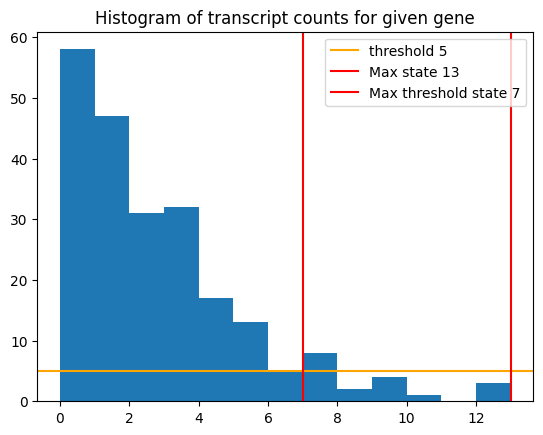

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-10
NLP: 0.36101746559143066


c:\Users\willi\Documents\Year 4 Project Work\Proj_venv\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


LP: 0.6951329708099365


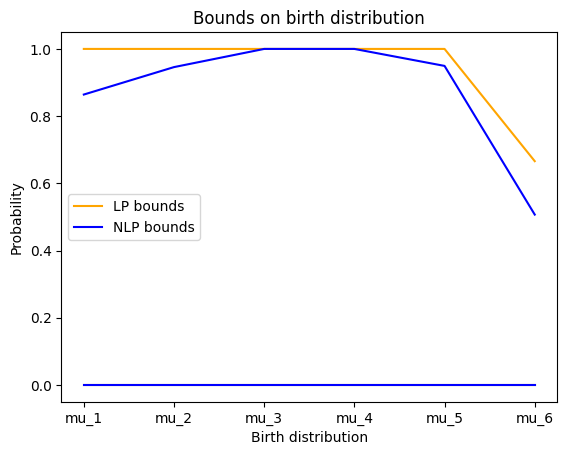

In [9]:
sample_ob = data_OB.iloc[0]
solution_ob = bound_sample_refined(sample_ob, threshold=5, skip=1, n=1000, N=None, plot_sample=True, print_bounds=False, print_status=True, plot_solution=True)

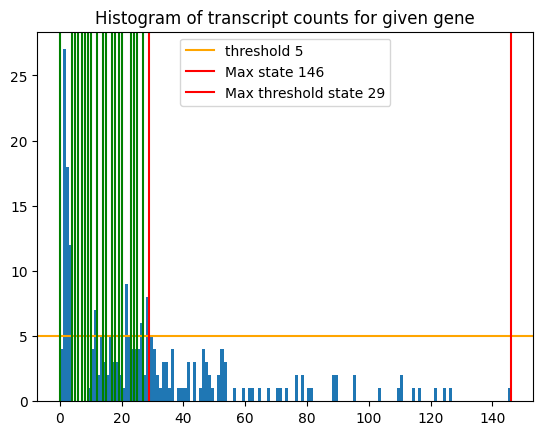

NLP: 101.78640103340149


c:\Users\willi\Documents\Year 4 Project Work\Proj_venv\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


LP: 18.33040475845337


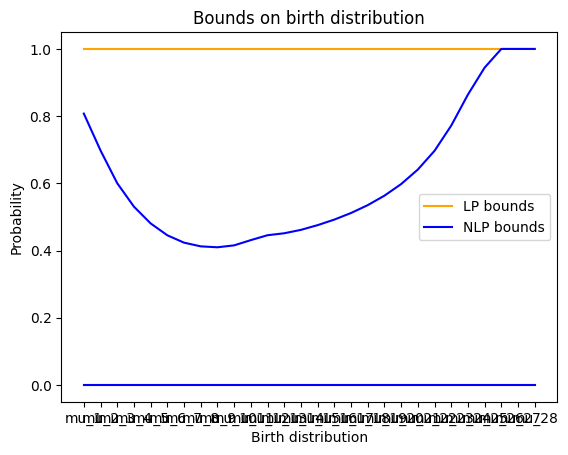

In [10]:
sample_map = data_MAP.iloc[0]
solution_map = bound_sample_refined(sample_map, threshold=5, skip=1, n=1000, N=None, plot_sample=True, print_bounds=False, print_status=True, plot_solution=True)

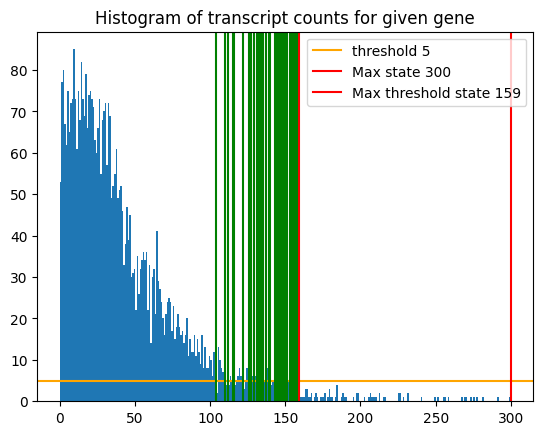

NLP: 26.734726667404175


c:\Users\willi\Documents\Year 4 Project Work\Proj_venv\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


LP: 14.450984001159668


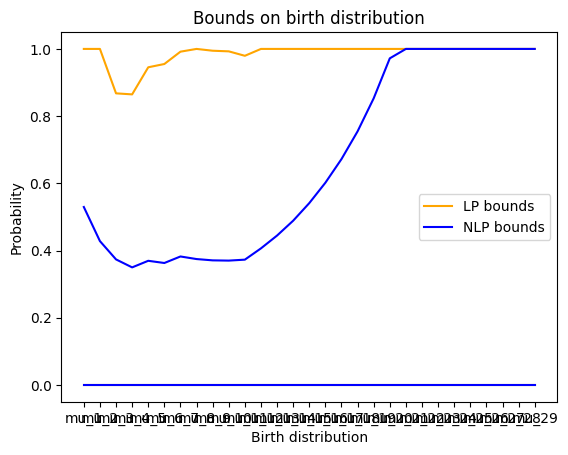

In [11]:
sample_ps = data_PS.iloc[0]
solution_ps = bound_sample_refined(sample_ps, threshold=5, skip=1, n=1000, N=30, K=100, plot_sample=True, print_bounds=False, print_status=True, plot_solution=True)

### Example plots: OB data

NLP: 0.234999418258667
LP: 0.44497179985046387


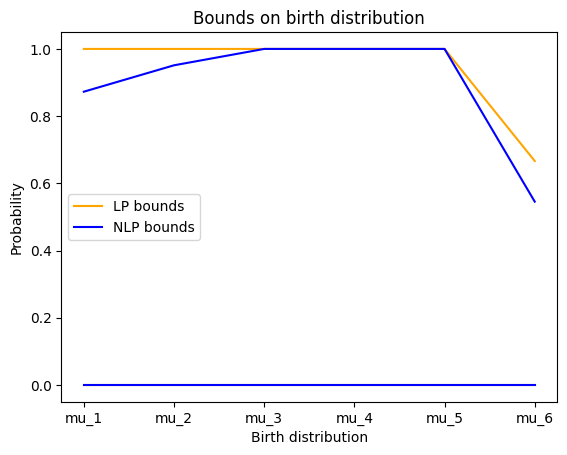

NLP: 0.40292954444885254
LP: 0.9522824287414551


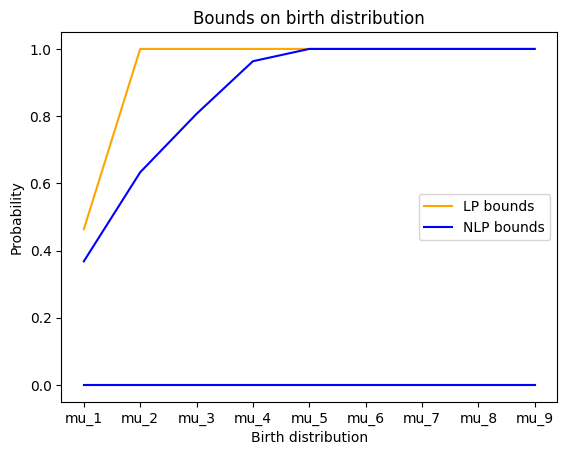

NLP: 5.747648000717163
LP: 5.826314926147461


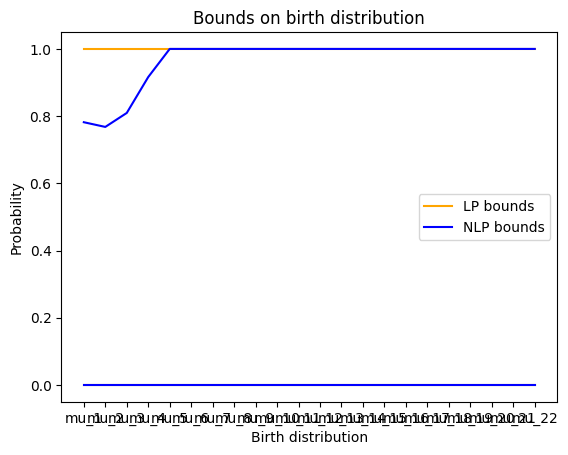

NLP: 0.03198862075805664


c:\Users\willi\Documents\Year 4 Project Work\Proj_venv\lib\site-packages\cvxpy\problems\problem.py:1409: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


LP: 0.7117419242858887


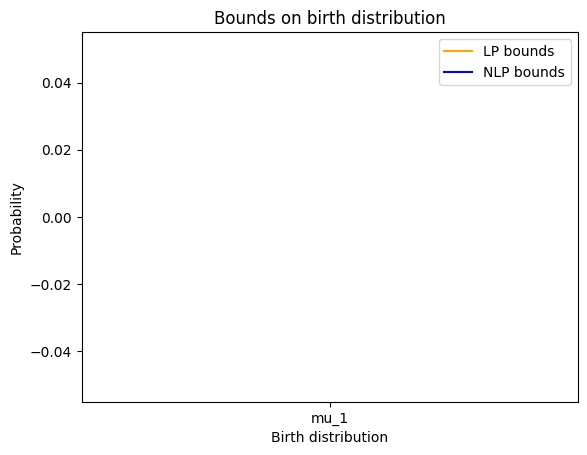

NLP: 0.18140053749084473
LP: 0.4230015277862549


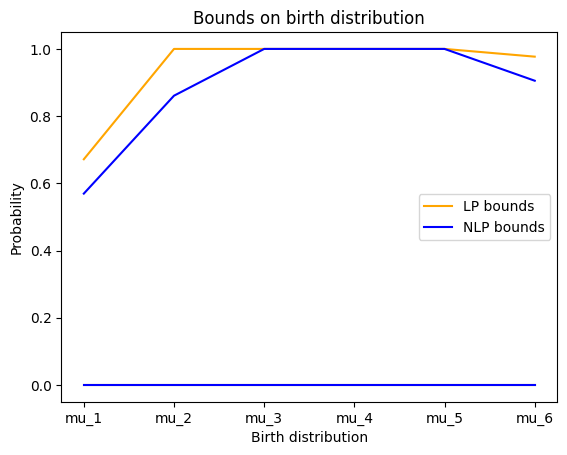

NLP: 0.3659796714782715
LP: 0.9781060218811035


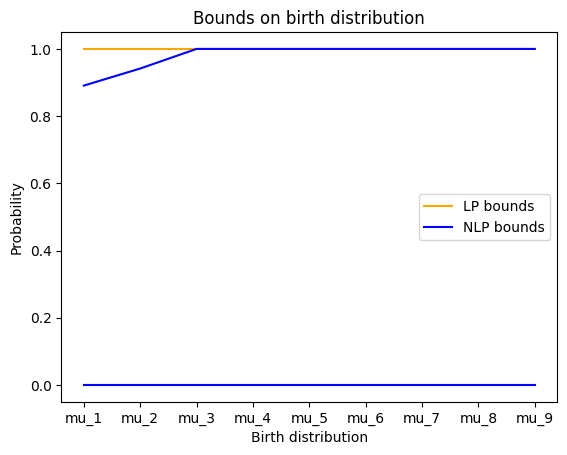

NLP: 0.1419389247894287
LP: 0.36803317070007324


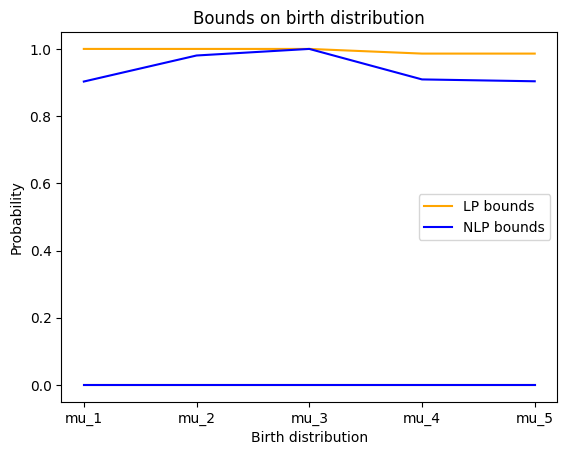

NLP: 0.11243152618408203
LP: 0.2539999485015869


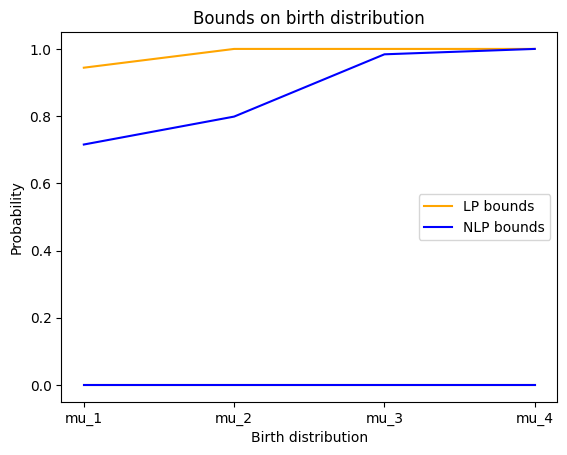

NLP: 0.4770467281341553
LP: 1.1209239959716797


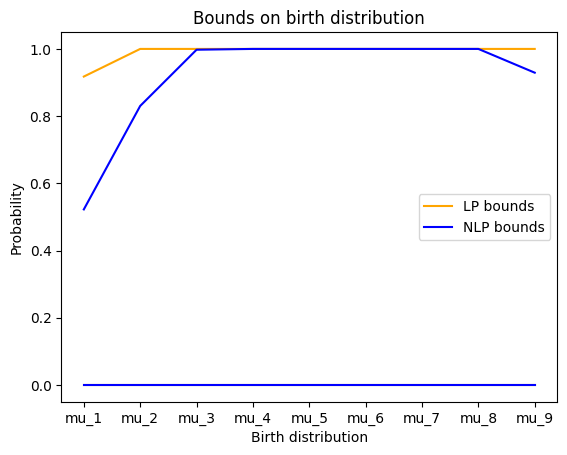

NLP: 0.05103302001953125
LP: 0.14299225807189941


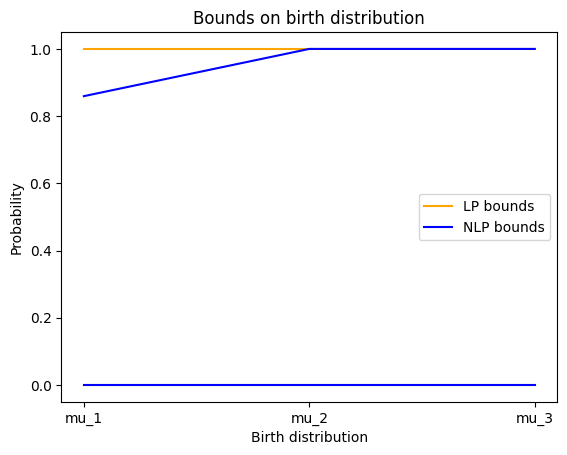

In [15]:
for i in range(10):
    sample = data_OB.iloc[i]
    solution = bound_sample_refined(sample, threshold=5, skip=1, n=1000, N=None, plot_sample=False, print_bounds=False, print_status=True, plot_solution=True)

### Example plots: MAP data

NLP: 73.64660692214966
LP: 11.31281328201294


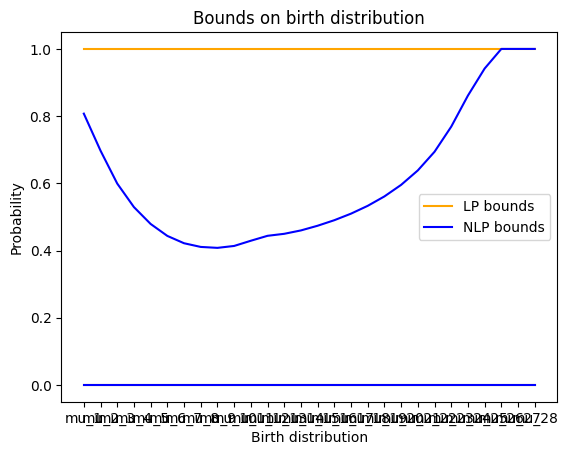

NLP: 268.13092255592346
LP: 58.38867235183716


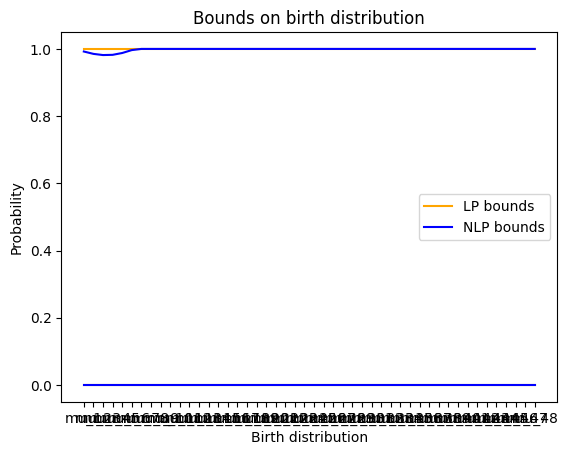

In [16]:
for i in range(10):
    sample = data_MAP.iloc[i]
    solution = bound_sample_refined(sample, threshold=5, skip=1, n=1000, N=None, plot_sample=False, print_bounds=False, print_status=True, plot_solution=True)

# NLP Upscaling

## Load Beta estimate

In [9]:
# List of Beta_j values for each cell j (named)
beta_data = pd.read_csv("..\Data\SS3_c57_UMIs_concat_BETA.csv", index_col="Unnamed: 0")
beta_data.head()

,x
SS3_MAF_Leo171129_p2_S10,0.056771
SS3_MAF_Leo171129_p2_S12,0.074493
SS3_MAF_Leo171129_p2_S13,0.068636
SS3_MAF_Leo171129_p2_S14,0.061267
SS3_MAF_Leo171129_p2_S16,0.059506


## B matrix

In [10]:
def B_matrix(beta, x_max, x_max_0):
    """
    Construct the binomial upscaling matrix B

    Arguments:
    beta: capture efficiencies for each cell
    x_max: observed truncation T = {0, ... , x_max}
    x_max_0: 'true' truncation T_0 = {0, ..., x_max_0}

    Returns:
    B: |T| x |T_0| upscaling matrix (x_max + 1, x_max_0 + 1)
    """
    if type(beta) == pd.core.frame.DataFrame:
        beta_list = list(beta['x'])
    elif type(beta) == float or type(beta) == int:
        beta_list = [beta]
    else:
        beta_list = np.array(beta)

    # initialise B
    B = np.zeros((x_max + 1, x_max_0 + 1))
    # loop over beta_j values
    for beta_j in beta_list:
        # create B_j matrix
        f = lambda x, x0: scipy.special.comb(x0, x) * beta_j**x * (1 - beta_j)**(x0 - x)
        B_j = np.fromfunction(f, (x_max + 1, x_max_0 + 1))
        # add to B
        B += B_j
    # scale B
    B = B / len(beta_list)
    return B

## CI of sample

In [11]:
def mean_CI(sample):
    '''Compute 95% confidence interval for the mean of the sample.'''
    # sample mean
    mean = np.mean(sample)
    # sample standard deviation
    std = np.std(sample)
    # size of the sample
    n = len(sample)
    # compute CI
    return (mean - 1.96 * (std / np.sqrt(n)), mean + 1.96 * (std / np.sqrt(n)))

## LP B solver

In [16]:
def bursty_LP_B(intervals, beta, x_max, x_max_0, mean_true_ub, k0=None, k1=None, M=None):
    """
    Solve the bursty LP system for interval bounds on parameters,
    upscaling observed data into true count data using B matrix

    Inputs:
    intervals: confidence intervals on observed count stationary distribution
    beta: capture efficiency/ies {allows single value or multiple as list/etc}
    x_max: use observed bounds p(0), ..., p(x_max)
    x_max_0: use upscaled bounds p(0), ..., p(x_max_0)
    mean_true_ub: upper bound on expected value of upscaled counts E[X^0]
    k0, k1: fixed values of parameters

    Outputs:
    solutions: dict with keys variables, values their solution intervals
    """
    # observed bounds from CI
    pl_obs = [intr[0] for intr in intervals]
    pu_obs = [intr[1] for intr in intervals]

    # select observed bounds on p(0), ..., p(x_max)
    pl_obs = np.array(pl_obs)[:x_max + 1]
    pu_obs = np.array(pu_obs)[:x_max + 1]

    # compute upscaling B matrix
    B = B_matrix(beta, x_max, x_max_0)

    # number of equations N = x_max_0
    N = x_max_0

    # compute uppper bound on truncation error
    t_bound = mean_true_ub / (x_max_0 + 1)

    # estikmate up to largest burst size (unless otherwise specified)
    if not M:
        M = N - 1
    
    # create Qr matrices: N rows requires N + 1 columns to include all terms (so (N, N + 1) size)
    # Q1: degradation
    Q1 = (np.diag([-x for x in range(0,N+1)],0) + np.diag([x for x in range(1,N+1)],1))[:-1, :]
    # Q00, Q01, ... : bursting
    Q00 = np.diag([-1 for x in range(0, N + 1)])[:-1, :]
    def Q0(m):
        """m = {1, 2, ...}"""
        return np.diag([1 for x in range(0, N + 1 - m)], -m)[:-1, :]

    # Construct the problem

    # Variables: unless k0 or k1 are fixed
    if not k0:
        k0 = cv.Variable()
    if not k1:
        k1 = cv.Variable()
    mu = cv.Variable(M)
    z0 = cv.Variable(N + 1)
    z1 = cv.Variable(N + 1)
    y = cv.Variable((N + 1, M))

    # constraints
    constraints = [
        # Qp = 0
        Q1 @ z1 + Q00 @ z0 + sum([Q0(m + 1) @ y[:, m] for m in range(0, M)]) == 0,
        # non-neg
        k0 >= 0, k1 >= 0, mu >= 0, z0 >= 0, z1 >= 0, y >= 0,
        # upscaled observed bounds
        k0 * pl_obs - k0 * t_bound <= B @ z0, B @ z0 <= k0 * pu_obs,
        k1 * pl_obs - k1 * t_bound <= B @ z1, B @ z1 <= k1 * pu_obs,
        # burst distribution constraints
        sum([y[:, m] for m in range(0, M)]) <= z0,
        sum([mu[m] for m in range(0, M)]) <= k0,
        # dist. const.
        sum([z0[x] for x in range(N + 1)]) <= k0,
        sum([z1[x] for x in range(N + 1)]) <= k1
    ]
    for m in range(0, M):
        constraints +=  [
            # upscaled observed counts
            mu[m] * pl_obs - mu[m] * t_bound <= B @ y[:, m], B @ y[:, m] <= mu[m] * pu_obs,
            # dist. const.
            sum([y[x, m] for x in range(N + 1)]) <= mu[m]
        ]

    # Objective
    c = cv.Parameter(M)
    objective = c @ mu
    objective_min = cv.Minimize(objective)
    objective_max = cv.Maximize(objective)

    # solution interval dict
    solutions = {}

    # values of c parameter: e_1, ..., e_M+2
    c_values = [[1 if i == j else 0 for j in range(M)] for i in range(M)]

    # create problem
    prob_min = cv.Problem(objective_min, constraints)
    prob_max = cv.Problem(objective_max, constraints)

    # variable names
    var_names = [f"mu_{m + 1}" for m in range(M)]

    # repeatedly solve
    for i, c_val in enumerate(c_values):
        # variable
        var_name = var_names[i]
        solutions[var_name] = []
        # set parameter value (chooses variable in objective)
        c.value = c_val
        # solve min: add to solution
        result_min = prob_min.solve(warm_start=True, solver=cv.GUROBI)
        try:
            solutions[var_name].append(prob_min.value)
        except:
            solutions[var_name].append(None)
        # solve max: add to solution
        results_max = prob_max.solve(warm_start=True, solver=cv.GUROBI)
        try:
            solutions[var_name].append(prob_max.value)
        except:
            solutions[var_name].append(None)
        # add statuses
        solutions[var_name].append(prob_min.status)
        solutions[var_name].append(prob_max.status)
    
    return solutions

## NLP B solver

In [17]:
def bursty_NLP_B(intervals, beta, x_max, x_max_0, mean_true_ub, K=100, k0=None, k1=None, M=None, printing=True):
    """
    Solve the bursty NLP system for interval bounds on parameters,
    upscaling observed data into true count data using B matrix

    Inputs:
    intervals: confidence intervals on observed count stationary distribution
    beta: capture efficiency/ies {allows single value or multiple as list/etc}
    x_max: use observed bounds p(0), ..., p(x_max)
    x_max_0: use upscaled bounds p(0), ..., p(x_max_0)
    mean_true_ub: upper bound on expected value of upscaled counts E[X^0]
    k0, k1: fixed values of parameters

    Outputs:
    solutions: dict with keys variables, values their solution intervals
    """
    # observed bounds from CI
    pl_obs = [intr[0] for intr in intervals]
    pu_obs = [intr[1] for intr in intervals]

    # select observed bounds on p(0), ..., p(x_max)
    pl_obs = np.array(pl_obs)[:x_max + 1]
    pu_obs = np.array(pu_obs)[:x_max + 1]

    # compute upscaling B matrix
    B = B_matrix(beta, x_max, x_max_0)

    # number of equations N = x_max_0
    N = x_max_0

    # compute uppper bound on truncation error: E[X^0]^U / (x_max_0 + 1)
    t_bound = mean_true_ub / (x_max_0 + 1)

    # estimate up to largest burst size (unless otherwise specified)
    if not M:
        M = N - 1
    
    # create Qr matrices: N rows requires N + 1 columns to include all terms (so (N, N + 1) size)
    # Q1: degradation
    Q1 = (np.diag([-x for x in range(0,N+1)],0) + np.diag([x for x in range(1,N+1)],1))[:-1, :]
    # Q00, Q01, ... : bursting
    Q00 = np.diag([-1 for x in range(0, N + 1)])[:-1, :]
    def Q0(m):
        """m = {1, 2, ...}"""
        return np.diag([1 for x in range(0, N + 1 - m)], -m)[:-1, :]

    # create model
    model = gp.Model("burst_NLP")

    # set options
    if not printing:
        model.Params.LogToConsole = 0

    # add variable p in [0, 1]
    p = model.addMVar(shape=N + 1, vtype=GRB.CONTINUOUS, name="p", lb=0, ub=1)
    pis = model.addMVar(shape=M, vtype=GRB.CONTINUOUS, name="pis", lb=0, ub=1)

    # initialize fixed / variable rates, constrain to [0, K] for computational reasons
    if not k0:
        k0 = model.addVar(vtype=GRB.CONTINUOUS, name="k0", lb=0, ub=K)
        k0_var = True
    else:
        k0_var = False
    if not k1:
        k1 = model.addVar(vtype=GRB.CONTINUOUS, name="k1", lb=0, ub=K)
        k1_var = True
    else:
        k0_var = False

    # Constraints:
    # Stationary condition: Qp = 0
    model.addConstr(k1*(Q1 @ p) + k0*(Q00 @ p) + gp.quicksum([k0*pis[m]*(Q0(m + 1) @ p) for m in range(0, M)]) == 0, name="Qp=0")
    # bounds
    model.addConstr(pl_obs - t_bound <= B @ p, name="lb")
    model.addConstr(B @ p <= pu_obs, name="ub")
    # distributions
    model.addConstr(p.sum() <= 1, name="pdist")
    model.addConstr(pis.sum() <= 1, name="pidist")

    # solution dictionary
    solutions = {}

    # optimize for each variable in turn
    if k0_var:
        # minimize
        model.setObjective(k0, GRB.MINIMIZE)
        try:
            model.optimize()
            min_val = model.ObjVal
        except:
            min_val = None

        # maximize
        model.setObjective(k0, GRB.MAXIMIZE)
        try:
            model.optimize()
            max_val = model.ObjVal
        except:
            max_val = None
        
        # store
        solutions['k0'] = [min_val, max_val]
    else:
        solutions['k0'] = [k0]
    
    if k1_var:
        # minimize
        model.setObjective(k1, GRB.MINIMIZE)
        try:
            model.optimize()
            min_val = model.ObjVal
        except:
            min_val = None

        # maximize
        model.setObjective(k0, GRB.MAXIMIZE)
        try:
            model.optimize()
            max_val = model.ObjVal
        except:
            max_val = None
        
        # store
        solutions['k1'] = [min_val, max_val]
    else:
        solutions['k1'] = [k1]

    for m in range(0, M):
        # minimize
        model.setObjective(pis[m], GRB.MINIMIZE)
        try:
            model.optimize()
            min_val = model.ObjVal
        except:
            min_val = None

        # maximize
        model.setObjective(pis[m], GRB.MAXIMIZE)
        try:
            model.optimize()
            max_val = model.ObjVal
        except:
            max_val = None
        
        # store
        solutions[f'mu_{m + 1}'] = [min_val, max_val]

    return solutions

## Full B method

In [56]:
def bound_sample_refined_B(sample, beta, threshold=5, skip=1, n=1000, K=100,
                         a=1, x_max=None, x_max_0=None,
                         plot_sample=True, print_bounds=False, 
                         print_status=True, plot_solution=True,
                         LP=True, NLP=True):
    """
    Given transcript samples from gene, bootstrap and solve LP to bound parameters

    sample: list of up to ~200 counts of transcripts of gene in cells
    beta: estimated capture efficiency for each cell in the sample (or a single value)
    threshold: minimum number of occurances in sample needed to include state x
            set to zero to use up to max state available
    skip: number of equations to drop after an infeasible result
    n: number of bootstrap samples
    K: pre-set maximum value of k's
    a: parameter for x_max_0 heuristic
    x_max: option to manually specify trunction of observed states
    x_max_0: option to manually specify truncation of upscaled states
    settings:
    plot_sample: toggle histogram of sample
    print_bounds: toggle printing CI bounds
    print_status: toggle printing feasible/infeasible reports
    plot_solution: toggle plotting solution bounds on distribution
    """

    # compute all possible observed bounds: p(0), ... , p(x_max)
    intervals = bootstrap_data_optim(sample, n, printing=print_bounds)

    # compute upper bound on mean of observed sample E[X]
    mean_ob_ub = mean_CI(sample)[1]

    # calculate upper bound on mean of true sample E[X^0]
    mean_beta = np.mean(beta)
    mean_true_ub = mean_ob_ub / mean_beta

    # dict of states and occurances in sample
    counts = sample.value_counts().to_dict()

    # largest observed state
    x_max_obs = int(np.nanmax(sample))

    if x_max is None:
        # find the largest state s.t. it and all smaller have at least threshold occurances
        x_max = 0
        for x in range(0, x_max_obs):
            if x in counts and counts[x] >= threshold:
                x_max = x
            else:
                # state not observed, or fewer than threshold observations
                break
    
    if x_max_0 is None:
        # heuristic choice of x_max_0
        x_max_0 = int(a * x_max // np.mean(beta))

    print(f"x_max = {x_max} \nx_max_0 = {x_max_0}")

    # plot sample hist and threshold
    if plot_sample:
        plt.hist(sample, bins=x_max_obs);
        plt.title("Histogram of transcript counts for given gene")
        plt.axhline(threshold, 0, 1, color="orange", label=f"threshold {threshold}")
        plt.axvline(x_max_obs, color="red", label=f"Max state {x_max_obs}")
        plt.axvline(x_max, color="red", label=f"Max threshold state {x_max}")
        #for x in non_bounds:
        #    plt.axvline(x, color="green")
        plt.legend()
        plt.show()
    
    if NLP:
        x_max_0_nlp = x_max_0
        s = time.time()
        solutions_dist_NLP = bursty_NLP_B(intervals, beta, x_max, x_max_0_nlp, mean_true_ub, k0=1, K=K, printing=False)
        print(f"NLP: {time.time() - s}")
    else:
        solutions_dist_NLP = None
    if LP:
        s = time.time()
        solutions_dist_LP = bursty_LP_B(intervals, beta, x_max, x_max_0, mean_true_ub, k0=1)
        print(f"LP: {time.time() - s}")
    else:
        solutions_dist_LP = None

    # estimating pi_1, ..., pi_M
    M = x_max_0 - 1
    
    # plot
    if plot_solution:
        # extract distribution bounds
        labels = [f'mu_{m}' for m in range(1, M + 1)]
        if LP:
            lower_LP = [solutions_dist_LP[var][0] for var in labels]
            upper_LP = [solutions_dist_LP[var][1] for var in labels]
            plt.plot(labels, upper_LP, label = "LP bounds", color="orange")
            plt.plot(labels, lower_LP, color="orange")
        if NLP:
            labels_NLP = [f'mu_{m}' for m in range(1, x_max_0_nlp)]
            lower_NLP = [solutions_dist_NLP[var][0] for var in labels_NLP]
            upper_NLP = [solutions_dist_NLP[var][1] for var in labels_NLP]
            plt.plot(labels_NLP, upper_NLP, label = "NLP bounds", color="blue")
            plt.plot(labels_NLP, lower_NLP, color="blue")
        plt.title("Bounds on birth distribution")
        plt.ylabel("Probability")
        plt.xlabel("Birth distribution")
        plt.legend()
        plt.show()

    # return bounds
    return solutions_dist_NLP, solutions_dist_LP

## Test

x_max = 3 
x_max_0 = 50


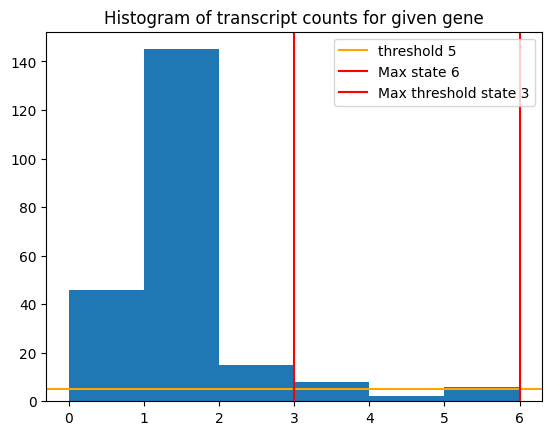

NLP: 1806.830411195755
LP: 11.43692922592163


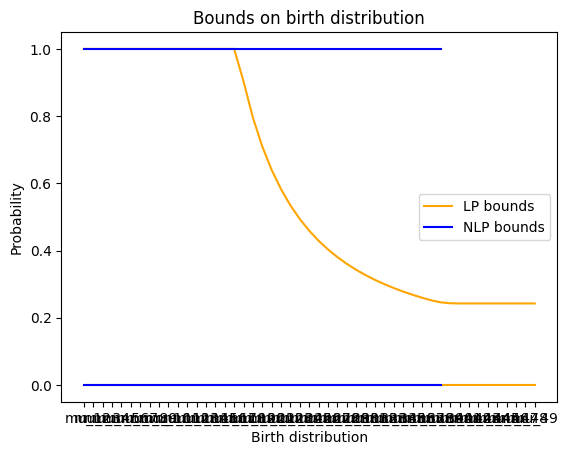

In [37]:
sample_ob = data_OB.iloc[1483]
solution_ob = bound_sample_refined_B(sample_ob, beta_data, threshold=5, skip=1, n=1000, plot_sample=True, print_bounds=False, print_status=True, plot_solution=True)

x_max = 4 
x_max_0 = 66


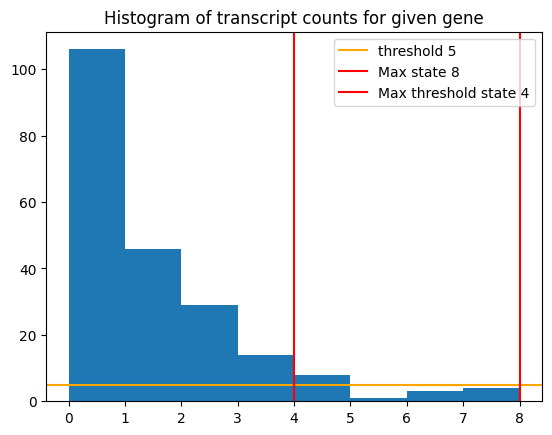

NLP: 199.2329659461975
LP: 30.01401996612549


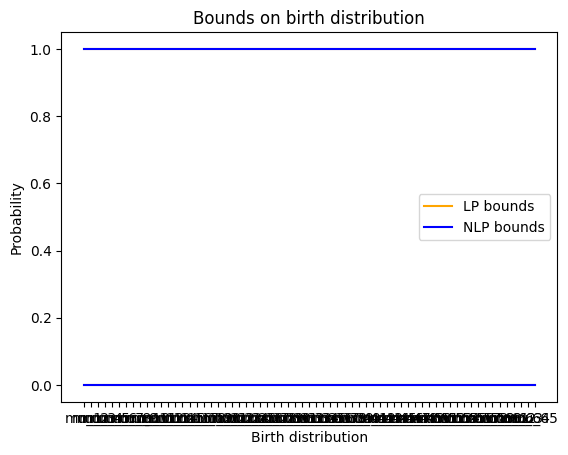

In [46]:
sample_ob = data_OB.iloc[9]
solution_ob = bound_sample_refined_B(sample_ob, beta_data, threshold=5, skip=1, n=1000, plot_sample=True, print_bounds=False, print_status=True, plot_solution=True)

x_max = 5 
x_max_0 = 83


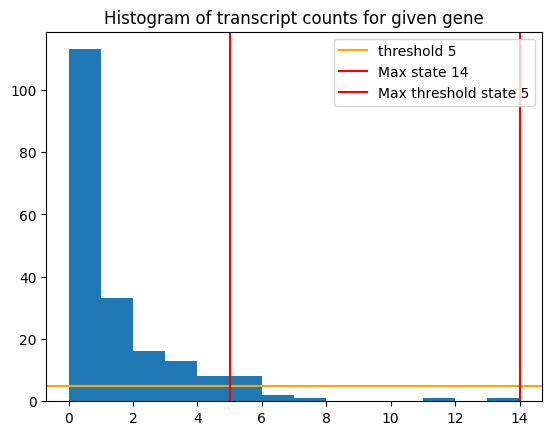

NLP: 225.60117030143738
LP: 57.8874626159668


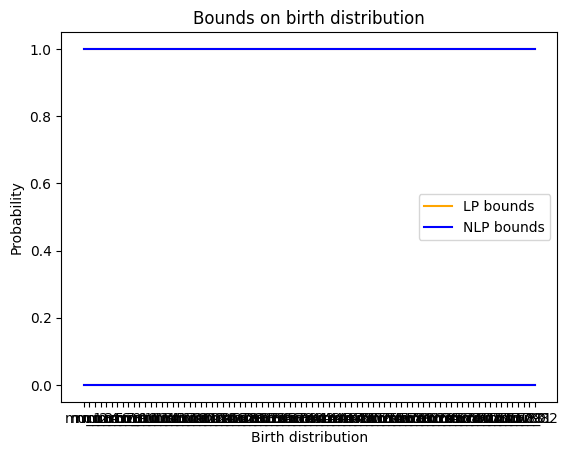

In [48]:
sample_ob = data_OB.iloc[7]
solution_ob = bound_sample_refined_B(sample_ob, beta_data, threshold=5, skip=1, n=1000, plot_sample=True, print_bounds=False, print_status=True, plot_solution=True)

x_max = 5 
x_max_0 = 83


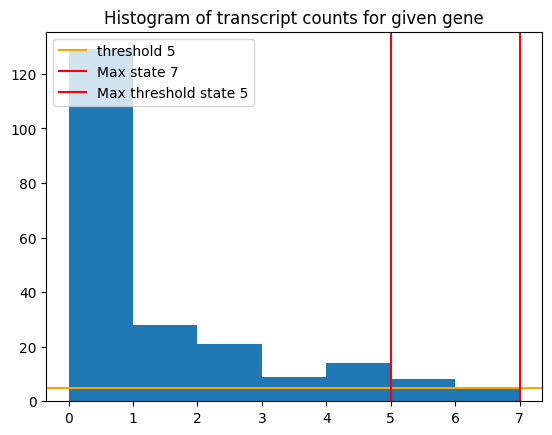

NLP: 173.11229801177979
LP: 81.3942060470581


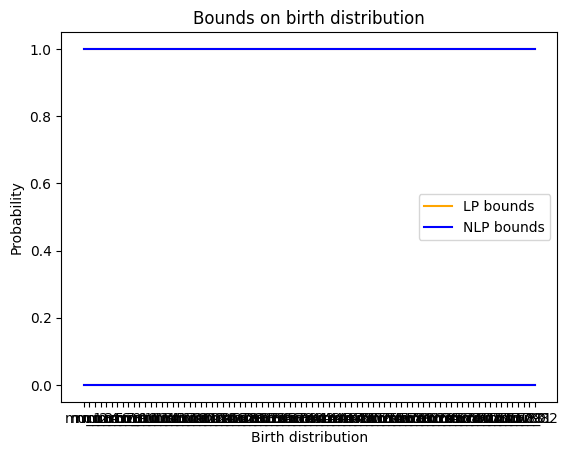

In [50]:
sample_ob = data_OB.iloc[20]
solution_ob = bound_sample_refined_B(sample_ob, beta_data, threshold=5, skip=1, n=1000, plot_sample=True, print_bounds=False, print_status=True, plot_solution=True)

x_max = 4 
x_max_0 = 66


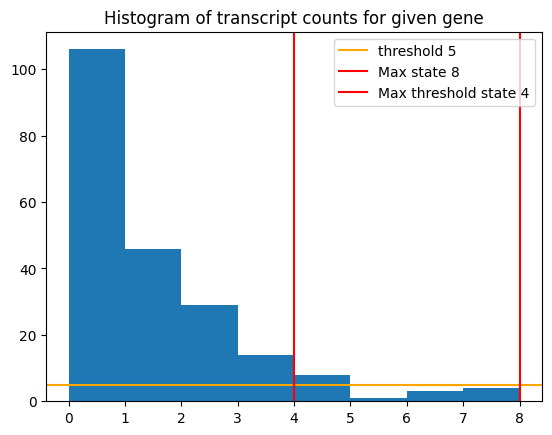

In [69]:
sample_ob = data_OB.iloc[9]
solution_ob = bound_sample_refined_B(sample_ob, beta_data, threshold=5, skip=1, n=1000, K=10, a=1, plot_sample=True, print_bounds=False, print_status=True, plot_solution=True)

(array([106.,  46.,  29.,  14.,   0.,   8.,   1.,   3.,   3.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

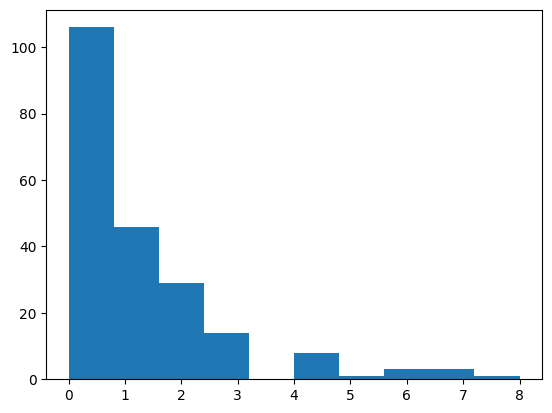

In [65]:
plt.hist(data_OB.iloc[9])